<a href="https://colab.research.google.com/github/Angelica2929/BI_Project_AIRBNB/blob/main/Project_2_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Lerning Project!** 
# ***Airbnb Open Data***

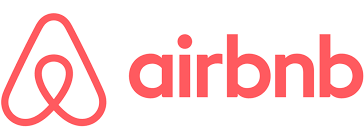


Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City.

**Source**:https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv

**Acknowledgment**:This dataset is part of Airbnb Inside but I tried to make new columns and many data inconsistency issue to create a new dataset to practice data cleaning. 

The original source can be found here http://insideairbnb.com/explore/

# **AIM**
Whas is the price of a airbnb according to the location? I will focus in predict the price of a stay according to the location.

# **Loading Information**

---



Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(font_scale=1)

Load the datased chosen

In [ ]:
df_airnb = pd.read_csv('/content/drive/MyDrive/CODING DOJO/Material Apoyo/Airbnb_Open_Data.csv', index_col = 'id')

df_airnb.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploring the data**

---



Let's see how is about our dataset

In [ ]:
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room type

In [ ]:
df_airnb.shape

(102599, 25)

In [ ]:
df_airnb.size

2564975

Our dataset is shaped by a total of **2.667.574** registers, distribuited like this:


102.599 Rows
26 columnns , it means 25 columns conform the set of characteristics if I dont count my target variable.

In [ ]:
df_airnb.describe()

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
df_airnb.describe().T

,count,mean,std,min,25%,50%,75%,max
host id,102599.0,4.925411e+10,2.853900e+10,1.236005e+08,2.458333e+10,4.911774e+10,7.399650e+10,9.876313e+10
lat,102591.0,4.072809e+01,5.585652e-02,4.049979e+01,4.068874e+01,4.072229e+01,4.076276e+01,4.091697e+01
long,102591.0,-7.394964e+01,4.952126e-02,-7.424984e+01,-7.398258e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,102385.0,2.012487e+03,5.765556e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,102190.0,8.135845e+00,3.055378e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,102416.0,2.748374e+01,4.950895e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,1.024000e+03
reviews per month,86720.0,1.374022e+00,1.746621e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.000000e+00,9.000000e+01
review rate number,102273.0,3.279106e+00,1.284657e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,102280.0,7.936605e+00,3.221878e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.320000e+02
availability 365,102151.0,1.411333e+02,1.354350e+02,-1.000000e+01,3.000000e+00,9.600000e+01,2.690000e+02,3.677000e+03


# **Cleaning our data**

---



Identify the  null values then I must order the columns with null variables in ascending order to know how we are going to impute them

In [ ]:
df_airnb.isna().sum().sort_values(ascending=False)

In [ ]:
print(df_airnb.isna().sum().sum(), 'missing values')

**Findings:**

*There are 190.769 missing values

*The dataset is shaped by categorical and numerical variables

Indentify duplicated values

In [ ]:
df_airnb.duplicated().sum()

The dataset has 541 duplicated values, we just have to remove them.

In [ ]:
df_airnb = df_airnb.drop_duplicates()
df_airnb.duplicated().sum()

The duplicates were removed.

In [ ]:
#df = pd.DataFrame(df_airnb)
#df = df_airnb.fillna(0)


All the NaN Values were replaced by 0, now It is accurate to imputate them.

In [ ]:
datos_null = ['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',]
for dato in datos_null:
    q_null = df_airnb[df_airnb[dato] == 0][dato].count()
    print(f'{dato} contiene {q_null} datos null: Representan el {round(q_null*100/df_airnb["price"].count(), 2)}% del conjunto de datos')

**Findings:**

*It is notorious that the license column has only 2 registered data, it is appropriate to eliminate it, since being information inherent to each host it cannot be replaced with any statistical inference.

*For the **Instant Bookable** column, the number 0 does not indicate null data, since it is a binary variable so they should not be eliminated, for teh rest of columns the values are replaced by 1 and 0.

In [ ]:
columns_names = df_airnb.columns.values
columns_names

It's accurate to eliminate the column *License* , it is completely empty (it has 2 registers).
Also the columns named like *house rules, guest's name , host id and host name*, they are irrelevant to predict the price of a airbnb stay, for that reason I eliminate them. 

In [ ]:
#Let's the new dataframe
df_airnb = df_airnb.drop(columns=['license','house_rules','NAME','host id','host_identity_verified','host name'])
df_airnb.head()

Ensure Consistency in Categorical Values!

In [ ]:
df_airnb['neighbourhood group'].unique()

In [ ]:

df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('brookln', 'Brooklyn') 
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('manhatan', 'Manhattan')
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('nan', 'Missing')
df_airnb['neighbourhood group'].unique()

In [ ]:
df_airnb['neighbourhood group'].value_counts()

Non-uniform categorical data is identified, the data is cleaned.

I explore the data registered in neighbourhood column in order to identify categorical mistakes.

In [ ]:
df_airnb['neighbourhood'].value_counts()

In [ ]:
df_airnb['neighbourhood'].unique()

In [ ]:
df_airnb['country code'].value_counts()

In [ ]:
df_airnb['country'].value_counts()

In [ ]:
df_airnb['instant_bookable'].value_counts()

This variable is a binary variable, the values 0 do not indicate null numbers, it identifies that the value of the boolean variable is TRUE.

In [ ]:
df_airnb['room type'].value_counts()

In [ ]:
df_airnb['cancellation_policy'].value_counts()

In [ ]:
df_airnb['review rate number'].value_counts()

In [ ]:
df_airnb.shape
df_airnb.nunique()

It is necessary to correct the data types, it shows the price  and service fee variables as categorical because they have a peso sign,but they are numbers, therefore we must adjust it.

In [ ]:
df_airnb["price"]

In [ ]:
df_airnb["price"] = df_airnb["price"].apply(lambda x: str(x).replace("$", ""))
df_airnb['price'] = df_airnb['price'].apply(lambda x: x.replace(',', ''))
df_airnb['price'] = df_airnb['price'].astype(float)
df_airnb.price

In [ ]:
df_airnb["service fee"] = df_airnb["service fee"].apply(lambda x: str(x).replace("$", ""))
df_airnb['service fee'] = df_airnb['service fee'].astype(float)
df_airnb.info()

Now let's imputate the null values at these variables.

In [ ]:
#I imputate the null values at this column with the mean
df_airnb.loc[df_airnb[df_airnb['price'].apply(lambda x: x) > 2022].index,'price'] = df_airnb['price'].mean()
df_airnb.loc[df_airnb['price'].isnull(), 'price'] = df_airnb['price'].mean()

In [ ]:
df_airnb['price'].isna().sum()

In [ ]:
#I imputate the null values at this column with the mean
df_airnb.loc[df_airnb[df_airnb['service fee'].apply(lambda x: x) > 2022].index,'service fee'] = df_airnb['service fee'].mean()
df_airnb.loc[df_airnb['service fee'].isnull(), 'service fee'] = df_airnb['service fee'].mean()

In [ ]:
df_airnb['service fee'].isna().sum()

The data type of the Last Review column is changed from object to date, like this:

In [ ]:
df_airnb['last review'] = pd.to_datetime(df_airnb['last review'])
df_airnb.dtypes

In [ ]:
# Let's check the min and max timestamps
df_airnb['last review'].min(), df_airnb['last review'].max()

In [ ]:
#There is a mistake with the year , it shows 2058, I fix it
df_airnb.loc[df_airnb[df_airnb['last review'].apply(lambda x: x.year) > 2022].index,'last review'] = df_airnb['last review'].median()
df_airnb.loc[df_airnb['last review'].isnull(), 'last review'] = df_airnb['last review'].median()
df_airnb['last review'].isnull().value_counts()
df_airnb.info()

In [ ]:
#Null values at this columns represents the 0.43% within the total of rows, so I elimina
df_airnb.dropna(subset=['availability 365'], inplace=True)
df_airnb.isna().sum()

In [ ]:
df_airnb['availability 365'] = df_airnb['availability 365'].astype(int)


In [ ]:
df_airnb.isna().sum()

In [ ]:
df_airnb.dropna(subset=['availability 365'], inplace=True)
df_airnb.isna().sum()

In [ ]:
df_airnb.info()

In [ ]:
#Impute both columns with United States and US , like this
df_airnb['country'].fillna('United States', inplace=True)
df_airnb['country'].isna().sum()

In [ ]:
df_airnb['country code'].fillna('US', inplace=True)
df_airnb['country code'].isna().sum()

In [ ]:
df_airnb['country'].isna().sum()

Impute null values with the mean of the other data from that same 'reviews per month' column, the same is replicated with the last 'review' column

In [ ]:
df_airnb.loc[df_airnb[df_airnb['reviews per month'].apply(lambda x: x) == 0].index,'reviews per month'] = df_airnb['reviews per month'].mean()
df_airnb.loc[df_airnb['reviews per month'].isnull(), 'reviews per month'] = df_airnb['reviews per month'].mean()

In [ ]:
df_airnb.loc[df_airnb[df_airnb['last review'].apply(lambda x: x) == 0].index,'last review'] = df_airnb['last review'].mean()
df_airnb.loc[df_airnb['last review'].isnull(), 'last review'] = df_airnb['last review'].mean()

In [ ]:
df_airnb.loc[df_airnb[df_airnb['review rate number'].apply(lambda x: x) == 0].index,'review rate number'] = df_airnb['review rate number'].mean()
df_airnb.loc[df_airnb['review rate number'].isnull(), 'review rate number'] = df_airnb['review rate number'].mean()

In [ ]:
df_airnb.dropna(subset=['neighbourhood group', 'neighbourhood', 'lat', 'long', 'instant_bookable', 'cancellation_policy',
       'Construction year', 'minimum nights',
       'number of reviews', 
       'review rate number', 'calculated host listings count'], inplace=True)


At this columns I decided to eliminate null values because they are accurate information of each booking case, it is difficult to imputate it.

In [ ]:
df_airnb.isna().sum()

In [ ]:
df_airnb.shape

There are no Nan Values, they were eliminated because the represented a 
low proportion with respect to the totality of the data. After this imputation and cleaning of our data, 541 rows were eliminated, it represents the 0.52%, no we can visualize the data.

# **Data Visualization**



---





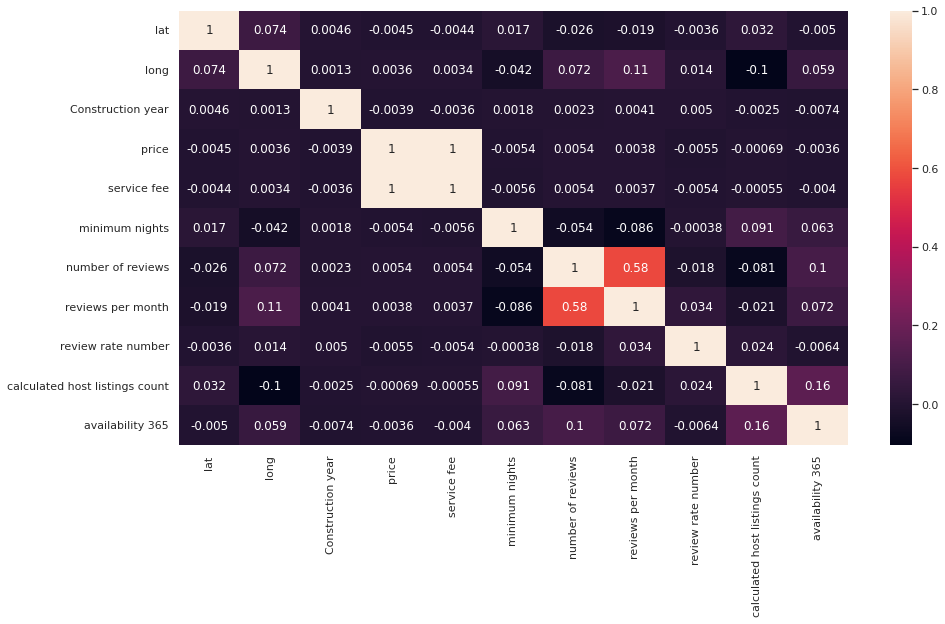

In [ ]:
import seaborn as sns
corr = df_airnb.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_airnb.corr(),annot = True)


I noticed strong correlation between service fee and price . It is important to highlight that the correlation among our variable target and the other variables is pretty low, also price has the stronger correlation with number of reviews, it works as a supply and demand game.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
price_per_year = df_airnb.groupby('Construction year')['price'].mean()
fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average price per construction year in USD',
            color_discrete_sequence=px.colors.sequential.Teal_r,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=15, color='white', family='Avenir'))

fig.show()

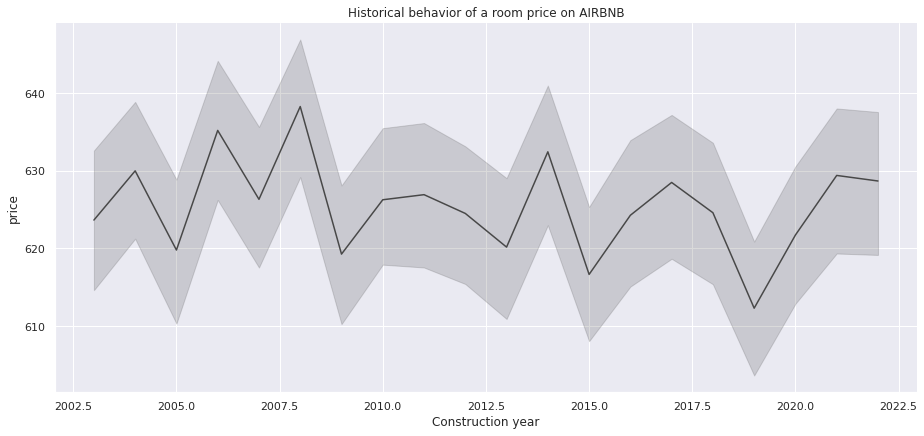

In [ ]:
sns.relplot(x = df_airnb['Construction year'], y = df_airnb['price'], data = df_airnb, kind = "line", color='#484848', height=6, aspect=13/6).set(title='Historical behavior of a room price on AIRBNB')

The plot shows us the behavior through the years of the arbnb price, there was a significant drop in 2008, which is consistent with the economic crisis that took place during that year.

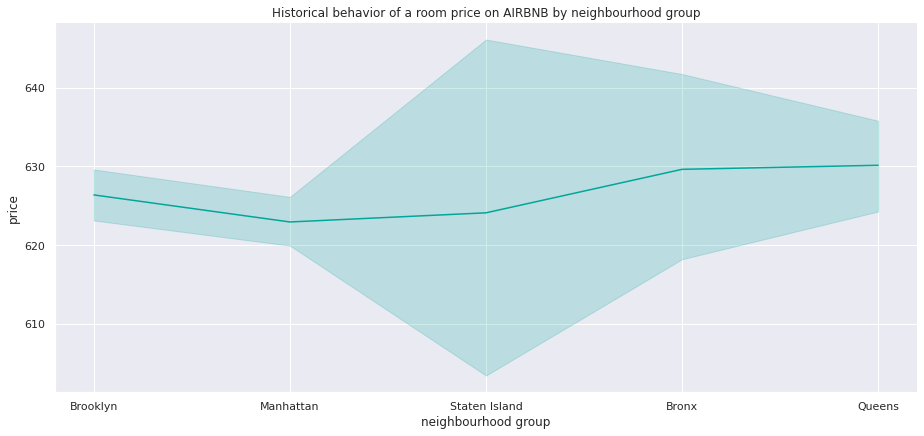

In [ ]:
sns.relplot(x = df_airnb['neighbourhood group'], y = df_airnb['price'], data = df_airnb, kind = "line", color='#00A699', height=6, aspect=13/6).set(title='Historical behavior of a room price on AIRBNB by neighbourhood group')

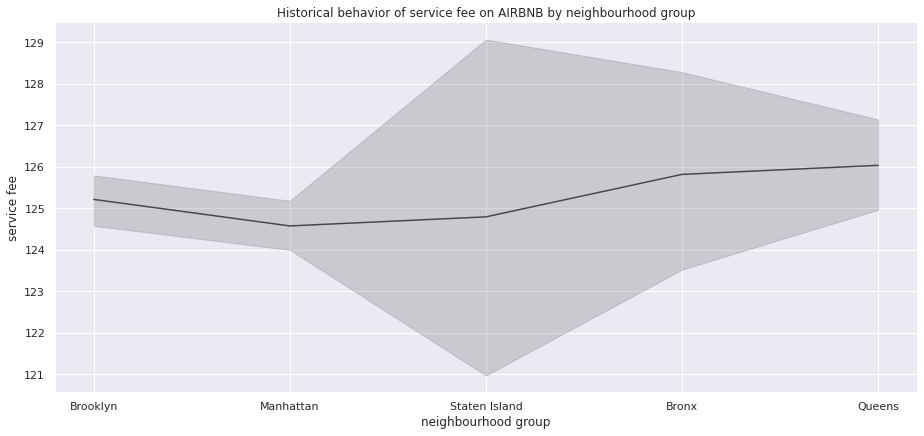

In [ ]:
sns.relplot(x = df_airnb['neighbourhood group'], y = df_airnb['service fee'], data = df_airnb, kind = "line", color='#484848', height=6, aspect=13/6).set(title='Historical behavior of service fee on AIRBNB by neighbourhood group')

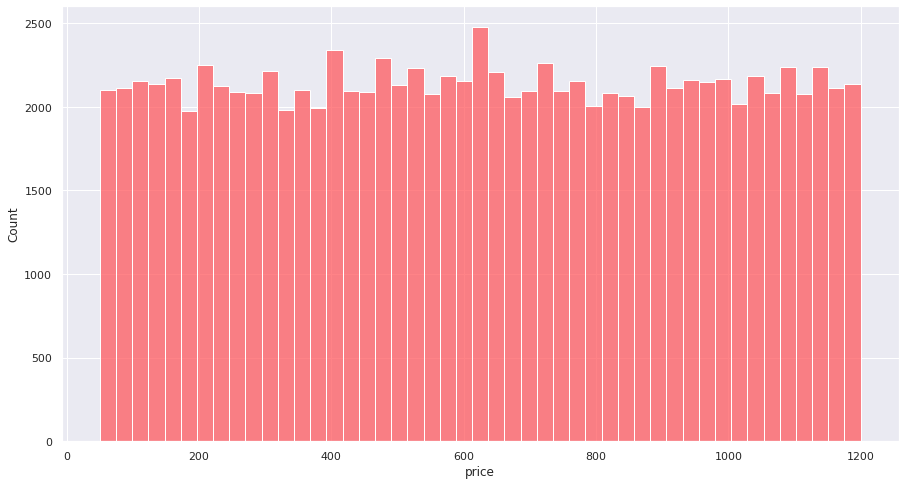

In [ ]:
sns.histplot(data=df_airnb, x="price", color = '#FF5A5F')

The previous histogram show us the majority of our sample of study is located in Brooklyn and Manhattan.

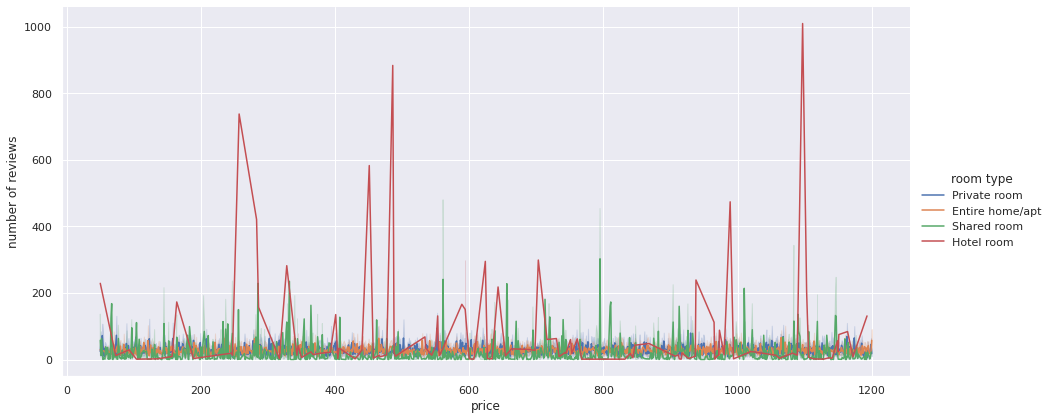

In [ ]:
sns.relplot(data=df_airnb, kind='line', x='price',  y='number of reviews', hue='room type',height=6, aspect=13/6);

[Text(0.5, 1.0, 'Price by Room Type')]

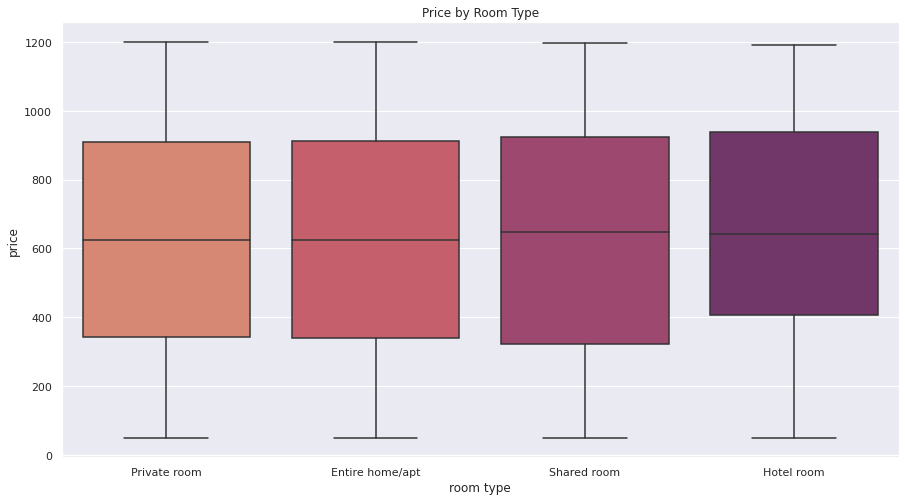

In [ ]:
sns.boxplot(y = 'price',       
            x = 'room type',    
            data = df_airnb,
            palette = 'flare'
            ).set(title='Price by Room Type')

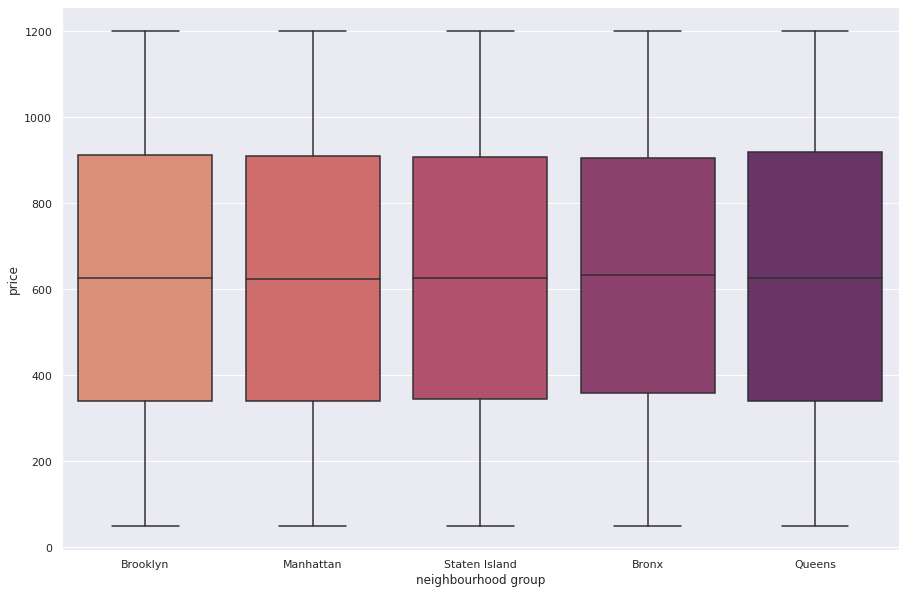

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="neighbourhood group", y="price", data=df_airnb,palette="flare")

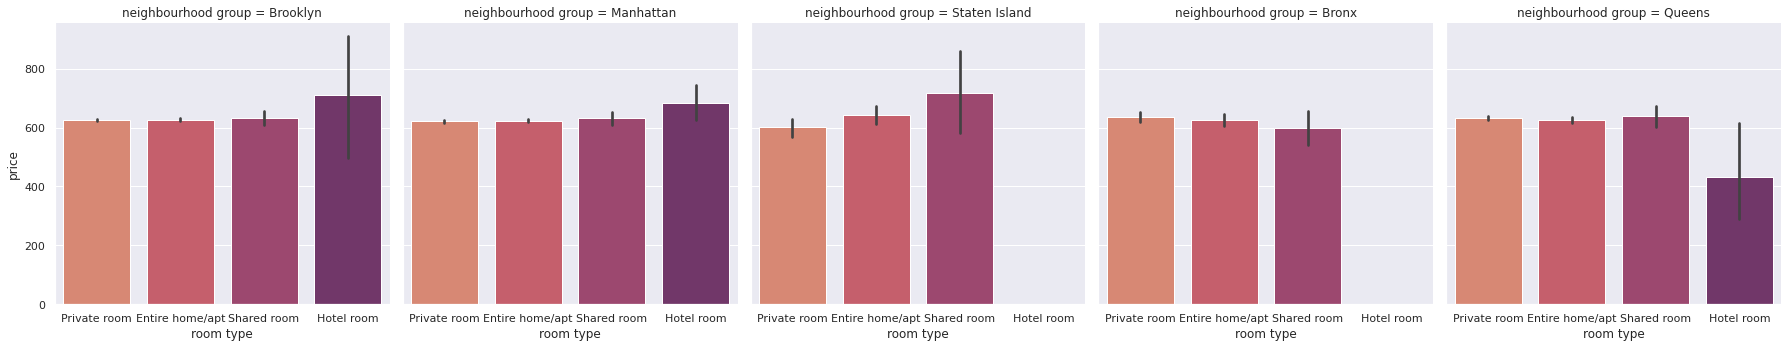

In [ ]:
sns.catplot(x="room type", y="price", col="neighbourhood group", data=df_airnb, kind = "bar", palette = 'flare');

In [ ]:
df_airnb

,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,
1001254,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.00000,193.000000,10.0,9.0,2021-10-19,0.210000,4.0,6.0,286
1002102,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.00000,28.000000,30.0,45.0,2022-05-21,0.380000,4.0,2.0,228
1002403,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.00000,124.000000,3.0,0.0,2019-06-13,1.375147,5.0,1.0,352
1002755,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.00000,74.000000,30.0,270.0,2019-07-05,4.640000,4.0,1.0,322
1003689,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.00000,41.000000,10.0,9.0,2018-11-19,0.100000,3.0,1.0,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57361894,Brooklyn,Williamsburg,40.71284,-73.96284,United States,US,False,moderate,Private room,2005.0,625.35558,125.039249,7.0,15.0,2018-01-01,0.550000,4.0,1.0,0
57362446,Manhattan,Upper West Side,40.79563,-73.97634,United States,US,True,flexible,Entire home/apt,2010.0,625.35558,125.039249,3.0,38.0,2019-06-10,1.400000,3.0,1.0,31
57362999,Manhattan,Hell's Kitchen,40.76125,-73.98945,United States,US,True,strict,Entire home/apt,2020.0,625.35558,125.039249,1.0,81.0,2019-03-05,2.960000,2.0,2.0,0


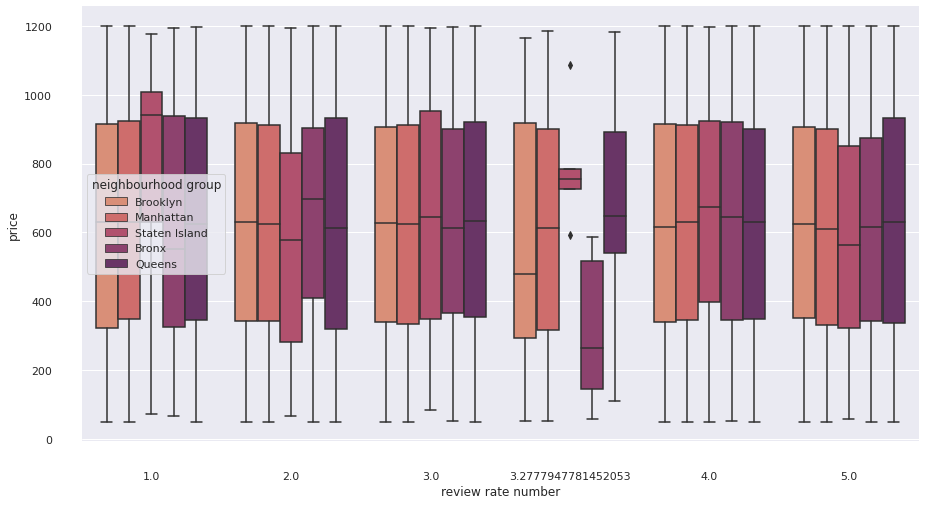

In [ ]:
sns.boxplot(x="review rate number", y="price",
            hue="neighbourhood group", palette='flare',
            data=df_airnb)
sns.despine(offset=20, trim=True)

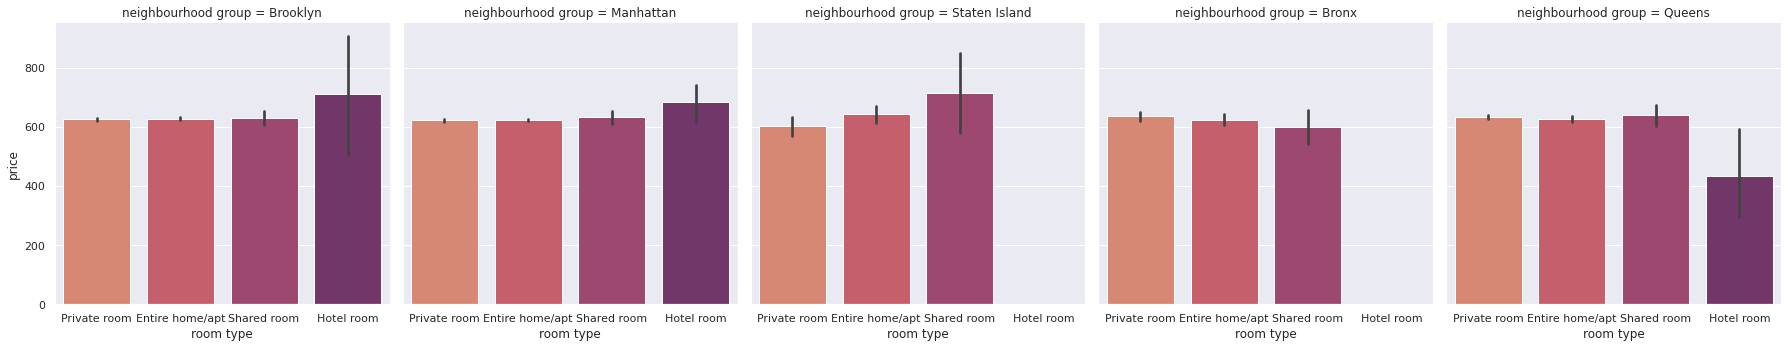

In [ ]:
sns.catplot(x="room type", y="price", col="neighbourhood group", data=df_airnb, kind = "bar",palette='flare')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

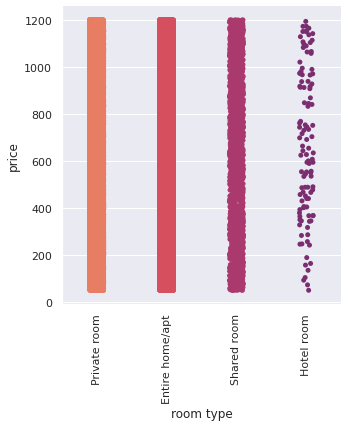

In [ ]:
sns.catplot(kind="strip",data=df_airnb, x='room type', y='price',palette = 'flare')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

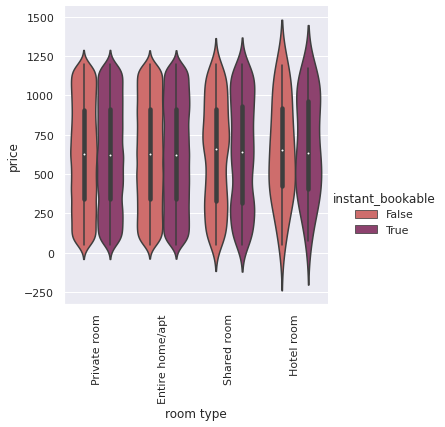

In [ ]:
sns.catplot(kind="violin",data=df_airnb, x='room type', y='price', hue='instant_bookable', palette = 'flare',figsize=(15, 10))
plt.xticks(rotation = 90)

# **Development and preprocessing of the our model**

---



Choose the target **(y)** and the characteritics **(X):**

In [ ]:
y = df_airnb['price']
X = df_airnb.drop(columns = 'price')

Make train test split to data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

As I have categorical variables it is necessary to scale data.

In [141]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

Perform one hot encoder encoding to our categorical characteristics

In [ ]:
#cat_selector = make_column_selector(dtype_include='object')

Select column categoric

In [ ]:
#cat_selector(X_train)

In [ ]:
#train_cat_data = X_train[cat_selector(X_train)]
#test_cat_data = X_test[cat_selector(X_test)]
#train_cat_data.head()

Encoding One Hot

In [ ]:
# Instanciar la codificación one-hot
#ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Ajustar el OneHotEncoder en los datos de entrenamiento
#ohe_encoder.fit(train_cat_data)
# Transformar los datos de entrenamiento y de prueba
#train_ohe = ohe_encoder.transform(train_cat_data)
#test_ohe = ohe_encoder.transform(test_cat_data)
#train_ohe

In [ ]:
#ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
#train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
#test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
#train_ohe

Concatenate with our numeric columns

In [ ]:
# Create a number picker
#num_selector = make_column_selector(dtype_include='number')
# Isolate the numerical columns
#train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
#test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# Recombine the training and test sets on axis 1 (columns)
#X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
#X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
#X_train_processed

# **Make use of pipelines to preprocess the model**

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')


Ordinal encoding

In [ ]:
df_airnb['cancellation_policy'].value_counts()

moderate    33666
strict      33441
flexible    33380
Name: cancellation_policy, dtype: int64

In [ ]:
replacement_dictionary = {'moderate':2, 'strict':1, 'flexible':0}
df_airnb['cancellation_policy'].replace(replacement_dictionary, inplace=True)
df_airnb['cancellation_policy']

id
1001254     1
1002102     2
1002403     0
1002755     2
1003689     2
           ..
57361894    2
57362446    0
57362999    1
57363551    2
57367417    0
Name: cancellation_policy, Length: 100487, dtype: int64

In [ ]:
df_airnb['cancellation_policy'].value_counts()

2    33666
1    33441
0    33380
Name: cancellation_policy, dtype: int64

***Column 'Cancellation Policy'is now a float and ordinal-encoded data type.***

Instantiate column selectors

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Instantiate transformers

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

Instantiate pipeline

In [ ]:
numeric_pipe = make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe = make_pipeline(freq_imputer,ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
nominal_pipe = make_pipeline(freq_imputer, ordinal_encoder)
nominal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

Instantiate column transform

In [ ]:
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
nominal_tuple = (nominal_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0555d58ad0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0555d58990>)])

Data transformer

In [ ]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0555d58ad0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0555d58990>)])

Wrap the 2 transformers inside ColumnTransformer. We will use this adjusted ColumnTransformer to transform our training and test data sets.

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (75365, 249)




array([[ 0.2770857 ,  0.84576573,  0.26496842, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16920319, -0.20706745, -0.95172071, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15200313, -1.13288703,  1.30784482, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59992386,  3.62444185,  0.61259389, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21805518, -0.1123145 , -1.47315891, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28480167,  0.03377143, -0.77790798, ...,  0.        ,
         0.        ,  0.        ]])

# **1.Linear Regression**

Import the regression model, I use it as first option because of my variable target is numeric

In [ ]:
from sklearn.linear_model import LinearRegression

Instantiate the model

In [ ]:
regression = LinearRegression()

Train the model on the training data.

In [ ]:
regression.fit(X_train_processed,y_train)

LinearRegression()

Score the Model

In [ ]:
train_score = regression.score(X_train_processed, y_train)
print(train_score)

0.995610878495809


In [135]:
test_score = regression.score(X_test_processed, y_test)
print(test_score)

-5538047648509.154


In [ ]:
train_preds = regression.predict(X_train_processed)
test_preds = regression.predict(X_test_processed)

In [ ]:
print(np.array(test_preds))

[ 431.68774414  599.71435547 1144.71386719 ...  655.50878906  290.921875
  450.42822266]


In [ ]:
print(np.array(y_test))

[ 432.  602. 1145. ...  655.  289.  448.]


# **1.1Regression Metrics**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [ ]:
mse_train 
mse_test 

6.06790122871343e+17

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
rmse_train 
rmse_test

778967343.9055985

# **2.Regression Tree**

Import the model of decision tree I want to use

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Instantiate the model

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

Fit the model using the training data.

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

Predict the target values for the training and test set

In [ ]:
reg_train_preds = dec_tree.predict(X_train_processed)
reg_test_preds = dec_tree.predict(X_test_processed)

In [ ]:
reg_train_preds

array([ 195.,  809.,  603., ...,  994., 1190., 1053.])

In [ ]:
reg_test_preds

array([ 430.,  602., 1145., ...,  655.,  292.,  448.])

In [ ]:
print(np.array(y_test))

[ 432.  602. 1145. ...  655.  289.  448.]


Score the model

In [ ]:
reg_train_score = dec_tree.score(X_train_processed, y_train)
reg_test_score = dec_tree.score(X_test_processed, y_test)

In [ ]:
reg_train_score 


0.9999721122907499

In [ ]:
reg_test_score

0.9907369741493408

With a regression tree model, predicting the price per stay in arbnb is almost perfect, which can be seen with the 99.07% accuracy in the test set data.

# **3.Bagged Trees**

Import the model I want to use

In [ ]:
from sklearn.ensemble import BaggingRegressor

Instantiate the model

In [ ]:
bagged_reg = BaggingRegressor(random_state = 42, n_estimators= 8)

In [ ]:
bagged_reg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Fit the bagged tree model in training data.

In [ ]:
bagged_reg.fit(X_train_processed, y_train)

BaggingRegressor(n_estimators=8, random_state=42)

Make predictions under this model

In [ ]:
bagged_reg.predict(X_test_processed)

array([ 430.25 ,  600.5  , 1144.625, ...,  655.375,  290.5  ,  448.875])

In [132]:
print(np.array(y_test))

[ 432.  602. 1145. ...  655.  289.  448.]


Score the model

In [ ]:
bagged_reg_train_score = bagged_reg.score(X_train_processed, y_train)
bagged_reg_test_score = bagged_reg.score(X_test_processed, y_test)
print(bagged_reg_train_score)
print(bagged_reg_test_score)

0.9989565212748758
0.995206587026467


With the tree bagging model we obtain an accuracy of 99.5% of the test set, a little higher than that obtained with a decision tree.

# **4.Random Forest**

Import the model

In [127]:
from sklearn.ensemble import RandomForestRegressor

Instantate the model I want to use

In [126]:
rf = RandomForestRegressor(random_state = 42)

Fit the model in training data

In [129]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

Make predictions under this model

In [131]:
rf.predict(X_test_processed)

array([ 430.09,  600.19, 1144.97, ...,  655.42,  289.94,  448.6 ])

In [133]:
print(np.array(y_test))

[ 432.  602. 1145. ...  655.  289.  448.]


Score the model used

In [134]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9992424060970915
0.995663699566505


After testing different regression models, such as decision tree, bagged tree, random forest, it is appropriate to say that our target PRICE variable is being predicted with an almost exact level in each of our models, highlighting the highest accuracy under the model random forest